In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/kc_house_data.csv')

In [3]:
#Check if there is null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
#Drop duplicate numbers if the dataset has.
df.drop_duplicates(inplace=True)

In [77]:
#Checking the number of variables after dropping variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21613 non-null  datetime64[ns]
 1   price           21613 non-null  float64       
 2   bedrooms        21613 non-null  int64         
 3   bathrooms       21613 non-null  float64       
 4   sqft_living     21613 non-null  int64         
 5   sqft_lot        21613 non-null  int64         
 6   floors          21613 non-null  float64       
 7   waterfront      21613 non-null  int64         
 8   view            21613 non-null  int64         
 9   condition       21613 non-null  int64         
 10  grade           21613 non-null  int64         
 11  sqft_above      21613 non-null  int64         
 12  sqft_basement   21613 non-null  int64         
 13  yr_built        21613 non-null  int64         
 14  yr_renovated    21613 non-null  int64         
 15  zi

In [78]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,year,house_age
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,264.156594,2014.322954,43.317818
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235,2014.000000,-1.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,182.291667,2014.000000,18.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,244.644550,2014.000000,40.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,318.322981,2015.000000,63.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.138889,2015.000000,115.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,110.060793,0.467616,29.375493


In [7]:
#Drop 'id' column since it is unnecessary to predict
df = df.drop(['id'], axis = 1)
#Convert 'time' column type
df['date'] = pd.to_datetime(df['date'])

In [8]:
#Extract the price per sqft.
df['price_per_sqft'] = df['price'] / (df['sqft_above'] + df['sqft_basement'])

In [9]:
df['year'] = df['date'].dt.year

In [10]:
df['house_age'] = df['year'] - df['yr_built']

In [11]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,year,house_age
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,2014,59


In [12]:
df_pred = df.drop(['date','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','lat','long','year'],axis = 1)

In [13]:
#Calculate correlations to identify which variables need to be use to predict the price of house
correlations = df_pred.corr()['price'].abs().sort_values(ascending=False)
#See the order of features which influence the price of house
#Find the features strongly influence the pirice of house (correlations > 0.5)
features_pred = correlations.index.tolist()
top_features_pred = correlations[correlations > 0.5].index.tolist()
print(features_pred)
print('Top list:',top_features_pred)

['price', 'grade', 'sqft_living15', 'price_per_sqft', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot15', 'house_age', 'zipcode', 'condition']
Top list: ['price', 'grade', 'sqft_living15', 'price_per_sqft', 'bathrooms']


In [14]:
results = ols("price ~ grade + sqft_living15 + price_per_sqft + bathrooms", data=df_pred).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:03:29   Log-Likelihood:            -2.9274e+05
No. Observations:               21613   AIC:                         5.855e+05
Df Residuals:                   21608   BIC:                         5.855e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.069e+06   9201.013   -116.

In [15]:
"y_hat = -1069000 + 80810grade + 119.7123sqft_living15 + 1799.5777price_per_sqft + 131200bathrooms"

'y_hat = -1069000 + 80810grade + 119.7123sqft_living15 + 1799.5777price_per_sqft + 131200bathrooms'

In [16]:
#Predict results of price with these main features
pred_vals = results.predict(df[['grade','sqft_living15','price_per_sqft','bathrooms']])

In [17]:
pred_vals

0        126344.202653
1        370607.716683
2        293008.615043
3        607378.710222
4        601351.354392
             ...      
21608    511780.867093
21609    435879.686775
21610    426236.615245
21611    523879.772339
21612    290207.944930
Length: 21613, dtype: float64

In [18]:
#Residuals
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [19]:
res

,y_hat,price
0,126344.202653,221900.0
1,370607.716683,538000.0
2,293008.615043,180000.0
3,607378.710222,604000.0
4,601351.354392,510000.0
...,...,...
21608,511780.867093,360000.0
21609,435879.686775,400000.0
21610,426236.615245,402101.0
21611,523879.772339,400000.0


In [20]:
#Looking for the difference between the predicted value and the actual value
res['error'] = res['y_hat'] - res['price']

In [21]:
#Calculate r^2 (coefficient)
res['sq_error'] = res['error']**2

In [22]:
#print out OLS model's mse
mse = res['sq_error'].mean()
mse

34050906039.364185

In [23]:
np.sqrt(res['sq_error'].mean())

184528.87589579087

In [32]:
#Create and split the categorical & numerical features
categorical_features = ['grade']
numerical_features = ['price_per_sqft','sqft_living15','bathrooms']
target = ['price']

In [33]:
#Setting train and test value for prediction model
X_train, X_test, y_train, y_test = train_test_split(df_pred[categorical_features + numerical_features]
                                                    ,df_pred['price'],
                                                    test_size = 0.3, random_state=1234)

In [34]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [35]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [55]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [56]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['price_per_sqft',
                                                   'sqft_living15',
                                                   'bathrooms'])])),
                ('regressor', LinearRegression())])

In [57]:
pred = linear_regression.predict(X_test)

In [76]:
print('mse for Linear Regression model is',np.sqrt(mean_squared_error(pred,y_test)))

mse for Linear Regression model is 168049.8372149065


In [36]:
#Using LASSO model to predict
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [37]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['price_per_sqft',
                                                   'sqft_living15',
                                                   'bathrooms'])])),
                ('regressor', Lasso())])

In [38]:
lasso_pred = lasso_regression.predict(X_test)

In [39]:
print('mse for LASSO model is', np.sqrt(mean_squared_error(lasso_pred, y_test)))

mse for LASSO model is 167920.77827296554


In [61]:
pred_lasso = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [62]:
pred_lasso['res'] = pred_lasso['pred'] - pred_lasso['price']

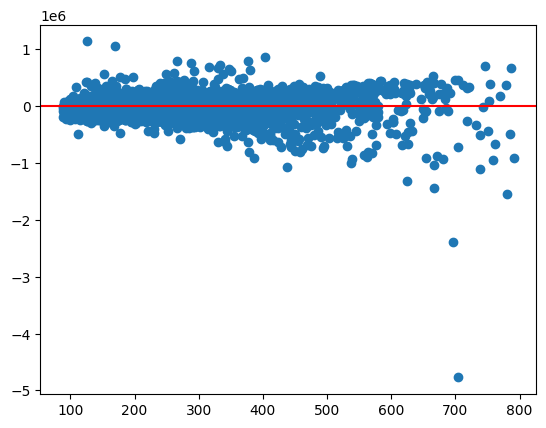

In [63]:
plt.scatter(X_test['price_per_sqft'],pred_lasso['res'])
plt.axhline(y=0, color='red', linestyle='-')

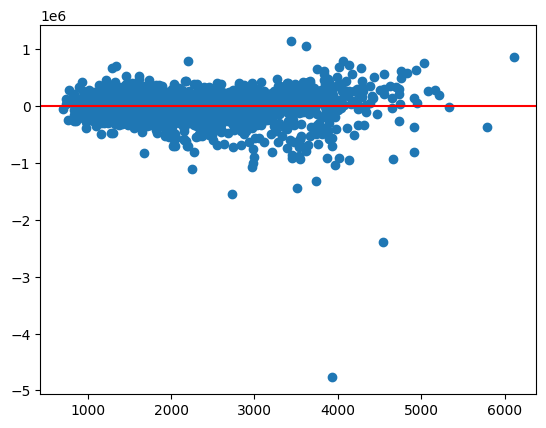

In [64]:
plt.scatter(X_test['sqft_living15'],pred_lasso['res'])
plt.axhline(y=0, color='red', linestyle='-')

((array([-3.70213724, -3.47078436, -3.34347054, ...,  3.34347054,
          3.47078436,  3.70213724]),
  array([-4772016.04088087, -2394047.99790485, -1538208.58594712, ...,
           865708.67128419,  1059510.23949188,  1139476.50837168])),
 (150134.17113075248, -1401.1108800015704, 0.8936360371380061))

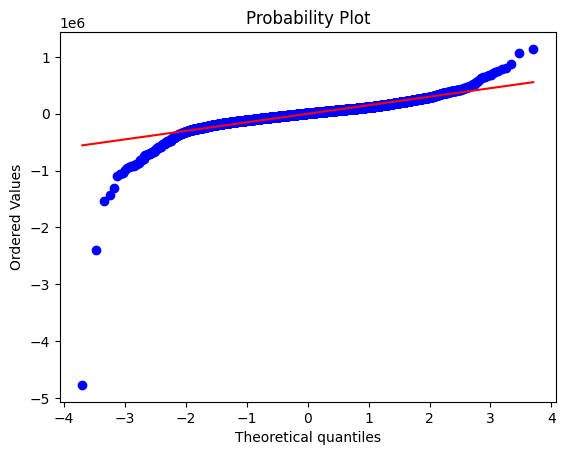

In [65]:
#Build Q-Q plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pred_lasso['res'], dist='norm', plot=ax)

In [67]:
model_dummy = sm.OLS(pred_lasso['res'], sm.add_constant(pred_lasso['pred']))
results_dummy = model_dummy.fit()

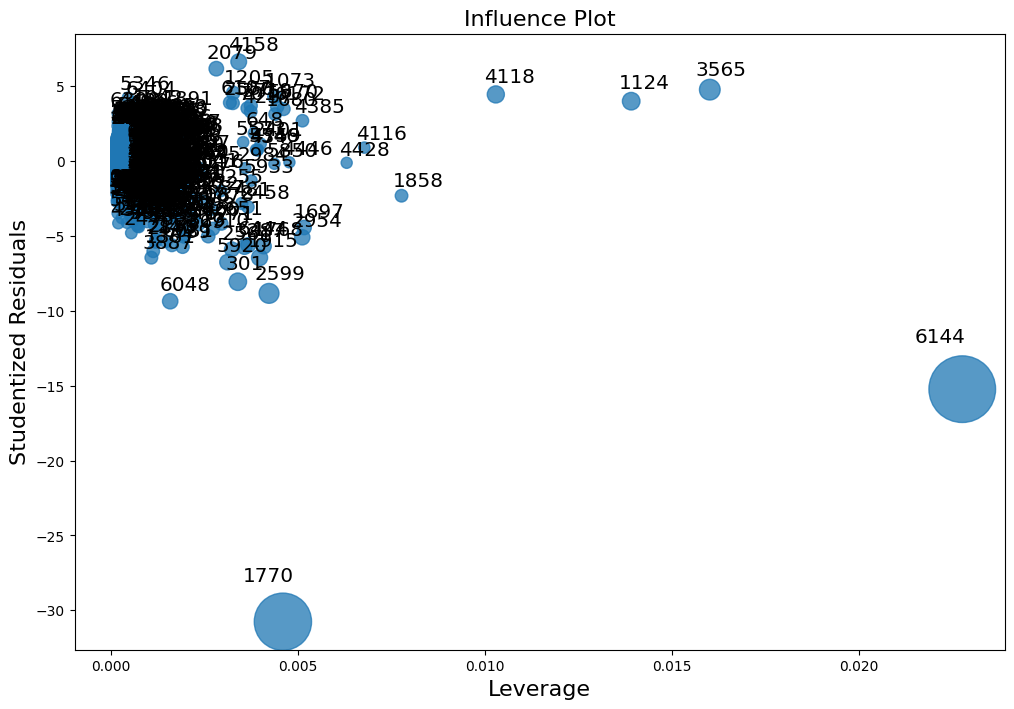

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.influence_plot(results_dummy, ax=ax, criterion='cooks')
plt.show()

In [69]:
outlier_indices = [1770, 6144, 3565, 1124, 4118, 1858]

X_filtered = pred_lasso['res'].drop(outlier_indices)
y_filtered = sm.add_constant(pred_lasso['pred']).drop(outlier_indices)


In [70]:
model_dummy_filtered = sm.OLS(X_filtered, y_filtered)
results_dummy_filtered = model_dummy_filtered.fit()

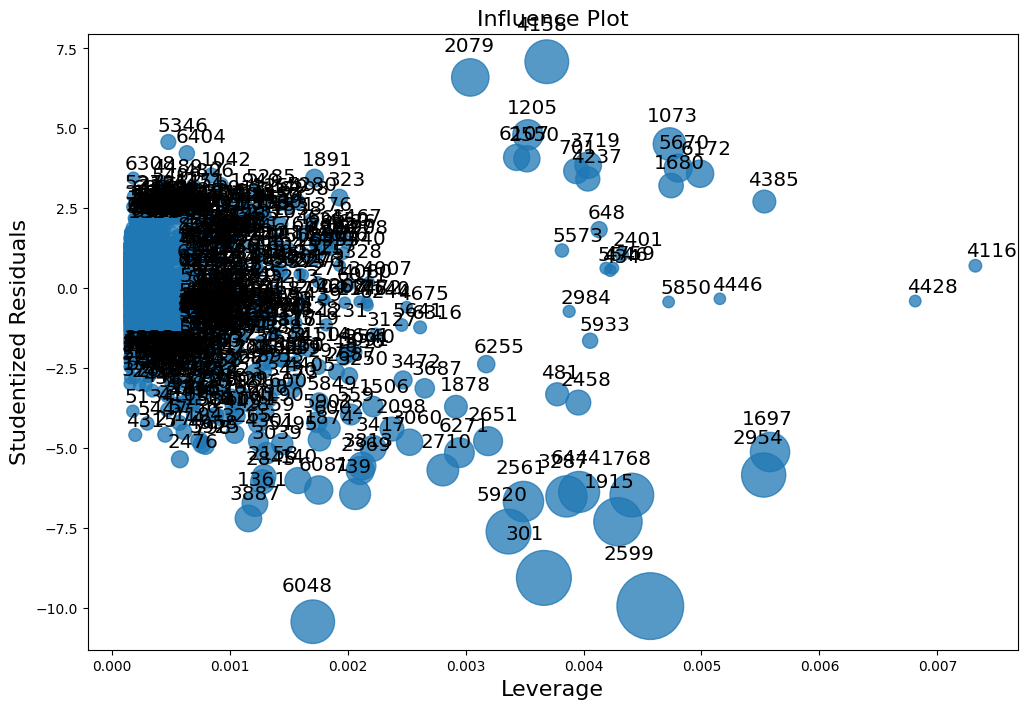

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.influence_plot(results_dummy_filtered, ax=ax, criterion='cooks')
plt.show()

In [72]:
#Using Ridge model to predict
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [73]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['price_per_sqft',
                                                   'sqft_living15',
                                                   'bathrooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [74]:
pred_ridge = ridge_regression.predict(X_test)

In [75]:
print('mse for Ridge model is', np.sqrt(mean_squared_error(pred_ridge,y_test)))

mse for Ridge model is 168079.94774864698


In [54]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [37]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [38]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [58]:
print('mse for Elastic Net model is', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))

mse for Elastic Net model is 252412.5672398861


In [40]:
df1 = df.drop(['date'], axis = 1)

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df1)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df1.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.98706050e-01 1.27107770e-01 9.71101675e-02 7.25173664e-02
 6.35052253e-02 5.29717864e-02 4.93086988e-02 4.40343935e-02
 3.47733504e-02 3.16396863e-02 2.69960697e-02 2.21205301e-02
 1.74759120e-02 1.54851902e-02 1.39287694e-02 1.24869134e-02
 1.02221929e-02 9.60992764e-03 1.26682684e-31]
Cumulative explained variance ratio: [0.29870605 0.42581382 0.52292399 0.59544135 0.65894658 0.71191837
 0.76122706 0.80526146 0.84003481 0.87167449 0.89867056 0.92079109
 0.93826701 0.9537522  0.96768097 0.98016788 0.99039007 1.
 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.787183,0.093635,-0.312826,0.724492,0.277739,-0.081160,0.647201,-0.085614,-0.338260,1.112971,0.018853,-0.924153,0.108300,0.387203,-0.110722,0.597585,-0.011796,-0.066034,-1.236004e-15
1,-0.115538,1.667041,-0.786663,1.831958,0.952796,4.173660,-0.761665,0.008565,0.386006,-1.027137,0.037381,-0.419011,0.010631,-0.310347,0.149261,-0.423623,0.954386,0.319284,4.130970e-15
2,-2.745091,-0.379096,0.366659,0.397640,0.109069,-0.355148,-1.759604,-1.326540,-0.549129,0.741544,0.007943,0.591860,0.091059,-1.160649,0.989366,-1.156686,-0.365785,0.065158,-1.953241e-14
3,-1.021326,2.083170,0.355177,-1.883953,0.355015,-0.392015,1.150529,1.136832,0.760762,-1.302736,-0.325364,-0.468286,0.488518,0.559037,-0.467881,-0.366072,-0.490206,0.196166,1.590408e-13
4,-0.354374,-1.010422,-0.195211,0.106185,-0.061725,-0.234612,-0.768868,-1.033637,-0.014082,0.303775,0.049580,-0.550829,0.365884,0.745584,-0.423248,0.248519,-0.208347,-0.232874,-2.353637e-15


In [42]:
#Reduce to 90% PC to narrow down those features
# Perform PCA
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.29870605 0.12710777 0.09711017 0.07251737 0.06350523 0.05297179
 0.0493087  0.04403439 0.03477335 0.03163969 0.02699607 0.02212053]
Cumulative explained variance ratio: [0.29870605 0.42581382 0.52292399 0.59544135 0.65894658 0.71191837
 0.76122706 0.80526146 0.84003481 0.87167449 0.89867056 0.92079109]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.787183,0.093635,-0.312826,0.724492,0.277739,-0.081160,0.647201,-0.085614,-0.338260,1.112971,0.018853,-0.924153
1,-0.115538,1.667041,-0.786663,1.831958,0.952796,4.173660,-0.761665,0.008565,0.386006,-1.027137,0.037381,-0.419011
2,-2.745091,-0.379096,0.366659,0.397640,0.109069,-0.355148,-1.759604,-1.326540,-0.549129,0.741544,0.007943,0.591860
3,-1.021326,2.083170,0.355177,-1.883953,0.355015,-0.392015,1.150529,1.136832,0.760762,-1.302736,-0.325364,-0.468286
4,-0.354374,-1.010422,-0.195211,0.106185,-0.061725,-0.234612,-0.768868,-1.033637,-0.014082,0.303775,0.049580,-0.550829


Question 1:
After data cleaning, I considered which features are influenced the price of house significantly; therefore, I extracted two variables (sqft_living & grade) by getting correlation. Using these two varibales to predict with OLS model.
Based on building pipeline to run for the training data, LASSO, Ridge, and Elastic Net model have been created for identifying which methods is the best to predict. 

According to the results of each r-squared and MSE values, OLS



Question 2:
According to 